In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
####CLEANING
dataset_path = "./anime-dataset-2023.csv"
anime_original_dataset = pd.read_csv(dataset_path)

numbers_cols = ["anime_id", "Favorites", "Members", "Popularity", "Score", "Episodes", "Rank", "Scored By"]
strings_cols = ["Name", "English name", "Other name", "Synopsis", "Aired", "Premiered", "Producers", "Licensors", "Studios", "Duration", "Image URL"]
categorical_cols = ["Type", "Status", "Source", "Rating", "Genres"]
all_cols = numbers_cols + strings_cols + categorical_cols

anime_original_dataset = anime_original_dataset[all_cols]

cols_we_dont_want = ["anime_id", "Favorites", "Members"] + strings_cols
anime_full_dataset = anime_original_dataset.drop(columns=cols_we_dont_want)
numbers_cols = numbers_cols[3:] # remove anime id from numbers_col

anime_full_dataset.replace("UNKNOWN", pd.NA, inplace=True)
anime_full_dataset.replace("Unknown", pd.NA, inplace=True)
anime_full_dataset.replace("Rx - Hentai", pd.NA, inplace=True) #remove unappropriate category

current_rows = anime_full_dataset.shape[0]
anime_full_dataset.dropna(inplace=True, how='any')#remove rows with any NaN value
after_filter_rows = anime_full_dataset.shape[0]
print(f"we started with {current_rows} rows and after cleaning we got: {after_filter_rows}")


#grouping for source column
#['4-koma manga' => Manga,
# 'Book' => Other,
# 'Card game' => Game,
# 'Game',
# 'Light novel' => Novel,
# 'Manga',
# 'Mixed media' => Other,
# 'Music' => Other,
# 'Novel',
# 'Original',
# 'Other',
# 'Picture book' => Other,
# 'Radio' => Other,
# 'Unknown',
# 'Visual novel' => Novel,
# 'Web manga' => Manga,
# 'Web novel' => Novel]
anime_full_dataset.replace("4-koma manga", "Manga", inplace=True)
anime_full_dataset.replace("Card game", "Game", inplace=True)
anime_full_dataset.replace("Light novel", "Novel", inplace=True)
anime_full_dataset.replace("Visual novel", "Novel", inplace=True)
anime_full_dataset.replace("Web manga", "Manga", inplace=True)
anime_full_dataset.replace("Web novel", "Novel", inplace=True)
anime_full_dataset.replace("Book", "Other", inplace=True)
anime_full_dataset.replace("Mixed media", "Other", inplace=True)
anime_full_dataset.replace("Music", "Other", inplace=True)
anime_full_dataset.replace("Picture book", "Other", inplace=True)
anime_full_dataset.replace("Radio", "Novel", inplace=True)
print(anime_full_dataset["Source"].value_counts())


we started with 24905 rows and after cleaning we got: 10559
Source
Manga       4143
Original    3218
Novel       1744
Game         843
Other        611
Name: count, dtype: int64


In [93]:

for col in numbers_cols:
    anime_full_dataset[col] = pd.to_numeric(anime_full_dataset[col], errors='coerce')

anime_full_dataset.head(20)

,Popularity,Score,Episodes,Rank,Scored By,Type,Status,Source,Rating,Genres
0,43,8.75,26.0,41.0,914193.0,TV,Finished Airing,Original,R - 17+ (violence & profanity),"Action, Award Winning, Sci-Fi"
1,602,8.38,1.0,189.0,206248.0,Movie,Finished Airing,Original,R - 17+ (violence & profanity),"Action, Sci-Fi"
2,246,8.22,26.0,328.0,356739.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,"Action, Adventure, Sci-Fi"
3,1795,7.25,26.0,2764.0,42829.0,TV,Finished Airing,Original,PG-13 - Teens 13 or older,"Action, Drama, Mystery, Supernatural"
4,5126,6.94,52.0,4240.0,6413.0,TV,Finished Airing,Manga,PG - Children,"Adventure, Fantasy, Supernatural"
5,1252,7.92,145.0,688.0,86524.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,Sports
6,862,8.00,24.0,589.0,81747.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,"Comedy, Drama, Romance"
7,4212,7.55,52.0,1551.0,12960.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,"Comedy, Slice of Life, Sports"
8,1273,8.16,24.0,393.0,97878.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,"Action, Drama"
9,142,8.87,74.0,26.0,368569.0,TV,Finished Airing,Manga,R+ - Mild Nudity,"Drama, Mystery, Suspense"


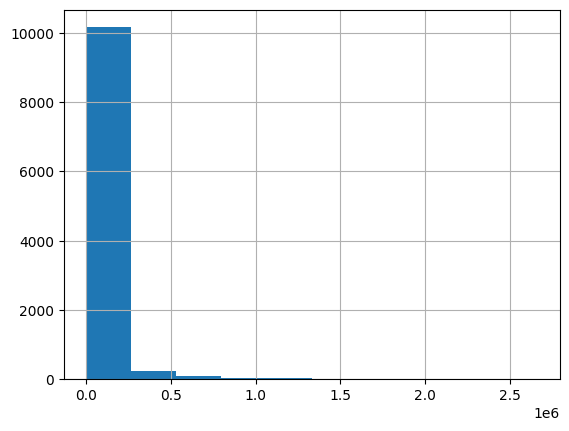

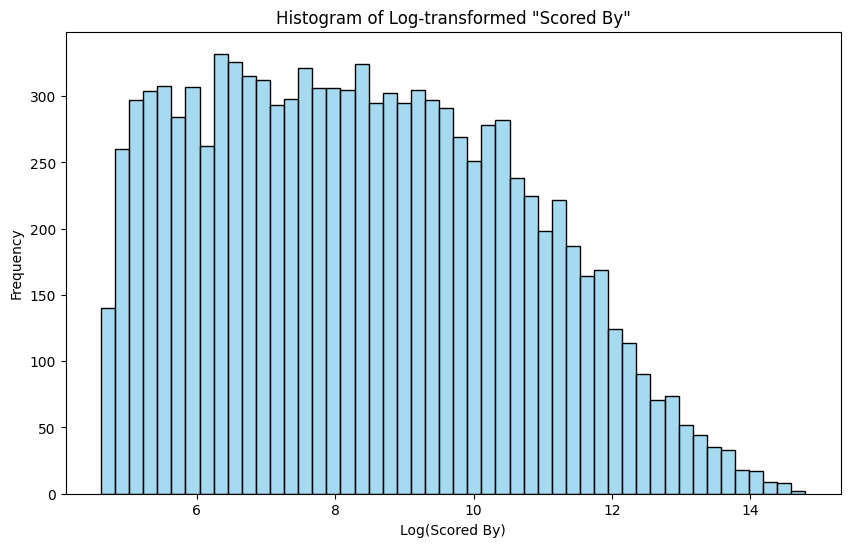

In [94]:
# @title Scored By histogram
anime_full_dataset['Scored By'].hist()

anime_full_dataset['Scored By'] = pd.to_numeric(anime_full_dataset['Scored By'], errors='coerce')
filtered_data = anime_full_dataset.dropna(subset=['Scored By'])
filtered_data['Log Scored By'] = np.log1p(filtered_data['Scored By'])
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Log Scored By'], kde=False, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Log-transformed "Scored By"')
plt.xlabel('Log(Scored By)')
plt.ylabel('Frequency')
plt.show()

An histogram that show how many animes we have in each of our Scored By's . We choose Sorce to be our target feature because we want to classify an anime to her Source.

### PART 2
---

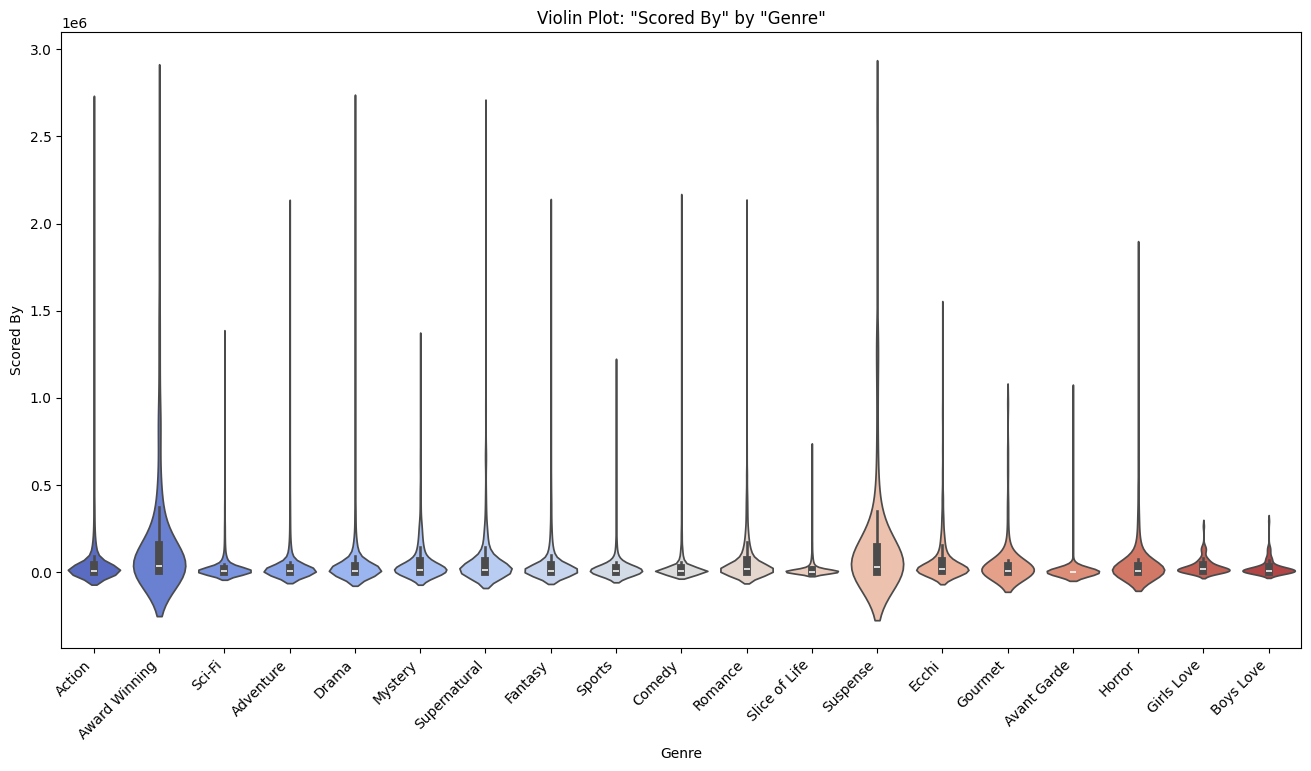

In [95]:
# @title Violin plot Scored By by Genre
def violin_column_by_source(df, column_name):
  plt.figure(figsize=(10, 4))
  sns.violinplot(data=df, x='Source', y=column_name, order=categories['Source'])
  plt.title(f"{column_name} Distribution by Source", fontsize=16)
  plt.xlabel('Source', fontsize=12)
  plt.ylabel(column_name, fontsize=12)
  plt.tight_layout()
  plt.show()

def violin_score_by_source(df):
  violin_column_by_source(df, "Score")

anime_full_dataset['Scored By'] = pd.to_numeric(anime_full_dataset['Scored By'], errors='coerce')
filtered_data = anime_full_dataset.dropna(subset=['Scored By', 'Genres'])
genres_split = filtered_data.assign(Genre=filtered_data['Genres'].str.split(', ')).explode('Genre')
plt.figure(figsize=(16, 8))
sns.violinplot(x='Genre', y='Scored By', data=genres_split, palette='coolwarm', hue='Genre', legend=False, density_norm='width')
plt.title('Violin Plot: "Scored By" by "Genre"')
plt.xlabel('Genre')
plt.ylabel('Scored By')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph shows a violin plot visualizing the distribution of "Scored By" across different "Genres" categories. We can see here what is the midian score of each category and the boxplot of each category.

We can see that most of the genres are actually distributed the same, but there are some exceptional genres (Award Winning, Suspense) that have a really high "Scored By" value and some genres (Slice Of Life, Girls Love, Boys Love) that have a little lower value.

This graph shows us that we can give special attention if we see the two big genres, and we can be sure that we are not missing any other trend in this field

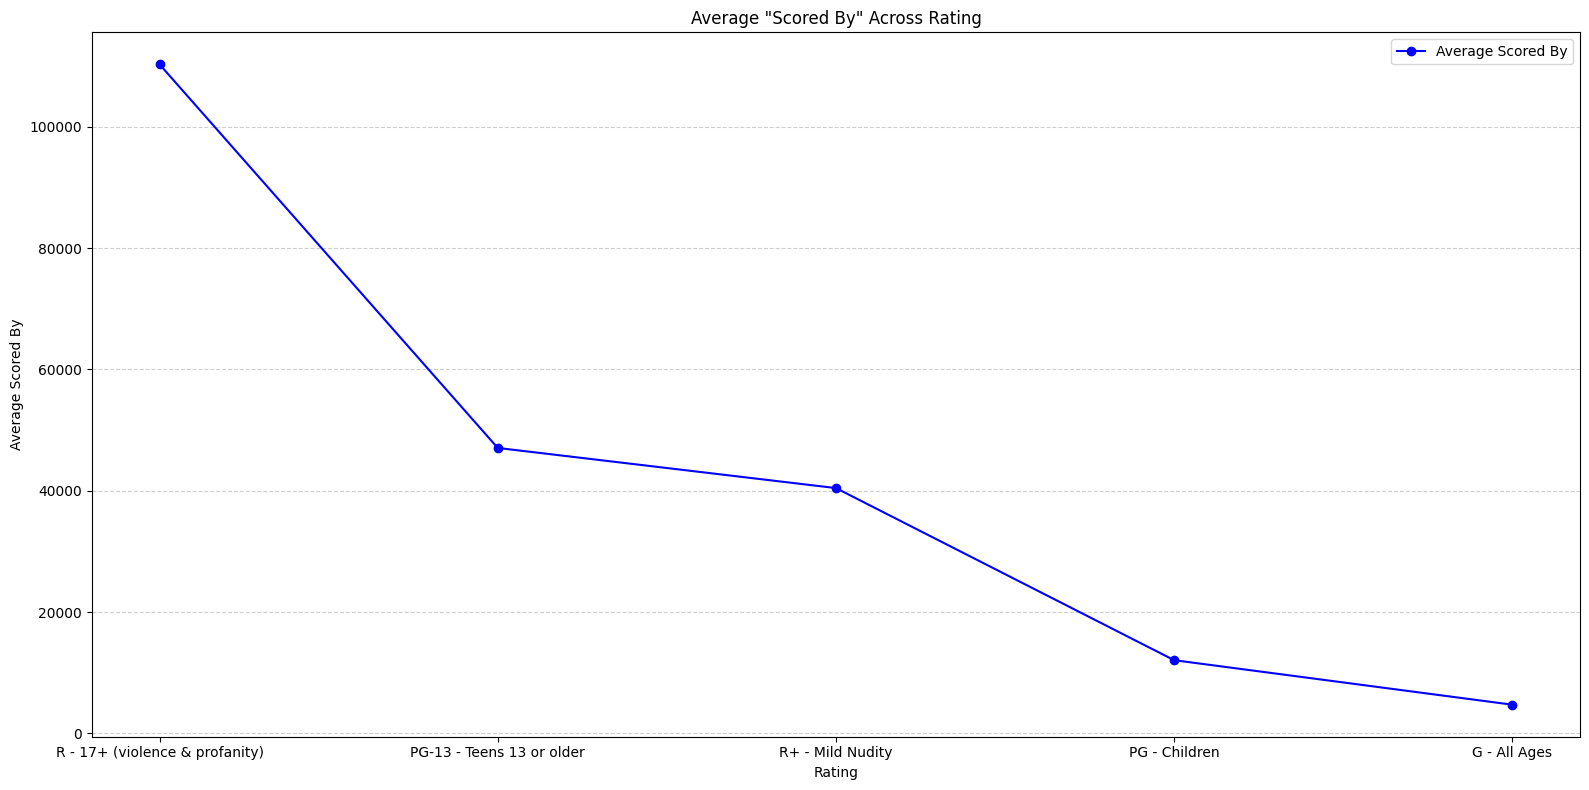

In [96]:
# @title Average "Scored By" Across Rating
anime_full_dataset['Scored By'] = pd.to_numeric(anime_full_dataset['Scored By'], errors='coerce')
filtered_data = anime_full_dataset.dropna(subset=['Scored By', 'Rating'])
rating_split = filtered_data.assign(Rating=filtered_data['Rating'].str.split(', ')).explode('Rating')
avg_scored_by_rating = rating_split.groupby('Rating')['Scored By'].mean().reset_index()
avg_scored_by_rating = avg_scored_by_rating.sort_values(by='Scored By', ascending=False)
plt.figure(figsize=(16, 8))
plt.plot(avg_scored_by_rating['Rating'], avg_scored_by_rating['Scored By'], marker='o', linestyle='-', color='blue', label='Average Scored By')
plt.title('Average "Scored By" Across Rating')
plt.xlabel('Rating')
plt.ylabel('Average Scored By')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

The graph shows a gragh that visualizing of the distribution of "Scored By" across "Rating" categories ("R - 17+", "PG-13", "R+", "PG", and "G"). We can see here what is the average of the Rating's categories . This could help us to identify the "Scored By" value of an anime by his rating and the disrtribution of the "Scored By" feature by "Rating" and his impact on "Scored By" feature. For example if we see "R-17" it's could be get high Scored By value.

The differences can also come from other variables like the average age of the viewer or access of the viewer to the MAL platform which the data was taken from

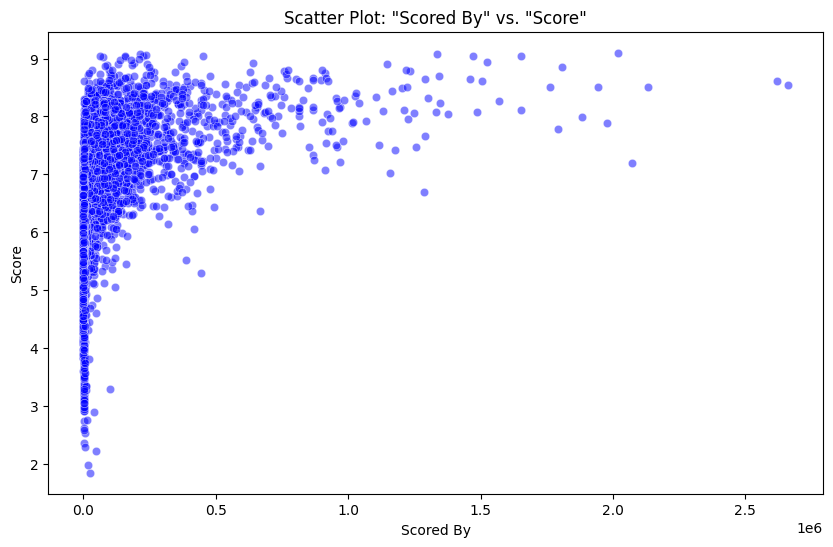

In [97]:
# @title Scatter Plot: "Scored By" vs. "Score"
anime_full_dataset['Scored By'] = pd.to_numeric(anime_full_dataset['Scored By'], errors='coerce')
anime_full_dataset['Score'] = pd.to_numeric(anime_full_dataset['Score'], errors='coerce')
filtered_data = anime_full_dataset.dropna(subset=['Scored By', 'Score'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Scored By', y='Score', data=filtered_data, color='blue', alpha=0.5)
plt.title('Scatter Plot: "Scored By" vs. "Score"')
plt.xlabel('Scored By')
plt.ylabel('Score')
plt.show()

The scatter plot is created, with "Scored By" on the x-axis and "Score" on the y-axis, shows the relationship between the number of people who rated an anime and the overall score or rating that the anime has received. For example this is help to know if the score is low so it means that the scored by is low either and where he is high it is hard to know.

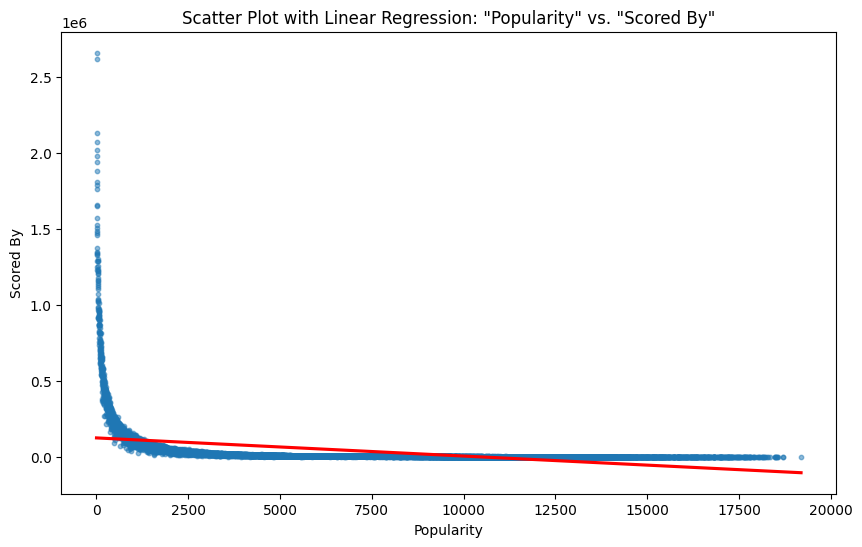

In [98]:
# @title Scatter Plot "Popularity" vs. "Scored By"
anime_full_dataset['Scored By'] = pd.to_numeric(anime_full_dataset['Scored By'], errors='coerce')
anime_full_dataset['Popularity'] = pd.to_numeric(anime_full_dataset['Popularity'], errors='coerce')
filtered_data = anime_full_dataset.dropna(subset=['Scored By', 'Popularity'])
plt.figure(figsize=(10, 6))
sns.regplot(x='Popularity', y='Scored By', data=filtered_data, scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'}, ci=None)
plt.title('Scatter Plot with Linear Regression: "Popularity" vs. "Scored By"')
plt.xlabel('Popularity')
plt.ylabel('Scored By')
plt.show()

This graph shows us the scatter plot of the Scored By value by the popularity, we can see that there is opposite corrolation betwen the two variables




In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categories = dict()
for col in categorical_cols:
  anime_full_dataset[col] = le.fit_transform(anime_full_dataset[col])
  valid_labels = list(le.classes_)
  categories[col] = valid_labels

<Axes: >

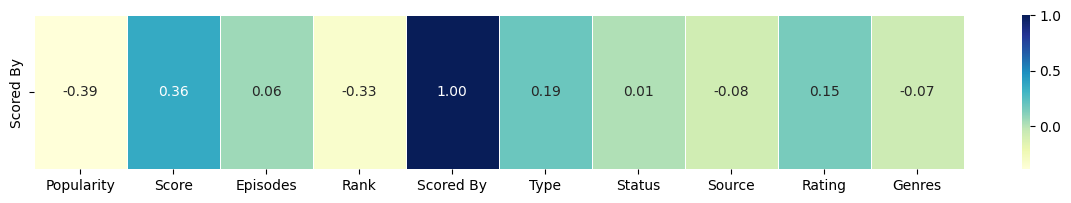

In [100]:
# @title Correlation of Scored By with each feature
dtf_corr = anime_full_dataset.corr(method="pearson").loc[["Scored By"]]
fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

The graph show us the correlation between "Scored By" and the others features we calculate the features by pearson method. This graph helps to identify which features are correlated with our target feature ("Scored By"). We can see here that there is no strong correlation between Source and the othe features and the maximum is "Popularity".

PART 3

In [101]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

def split_train_test(df_to_split, column_name, test_size=0.25):
  anime_train, anime_test = train_test_split(df_to_split.sort_values(column_name),
                        test_size=test_size)

  return anime_train, anime_test


In [102]:
def create_prediction(df_train, df_test, column_name, categorical=False):
  X_train = df_train.drop(column_name,axis=1)
  X_test = df_test.drop(column_name,axis=1)

  y_train = df_train[column_name]
  y_test = df_test[column_name]
  if categorical:
    model = LogisticRegression(max_iter=1000, solver="liblinear")
  else:
    model = LinearRegression()
  prediction = model.fit(X_train,y_train).predict(X_test)
  return y_test, prediction, model, X_train, X_test

In [103]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error, accuracy_score, precision_score, recall_score

def print_predictions_metrics_numerical(y_test, prediction):
  print("r2 score:","{:,.3f}".format(r2_score(y_test,prediction)))
  print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
  print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
  print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

  ## residuals
  residuals = y_test - prediction
  max_error = residuals.abs().max()
  print("Max Error:", "{:,.0f}".format(max_error))

def print_predictions_metrics_categorical(y_test, prediction, column_name):
  category_labels = categories[column_name]
  display_labels = range(0,y_test.unique().shape[0])

  Accuracy = accuracy_score(y_test, prediction)
  Precision = precision_score(y_test, prediction, average="micro")
  Sensitivity_recall = recall_score(y_test, prediction, average="micro")
  print(f"Accuracy: {Accuracy}\n Precision: {Precision}\n Recall: {Sensitivity_recall}")


In [104]:
def print_prediction_graph_numerical(y_test, prediction):
  fig, ax = plt.subplots(figsize=(8,5))
  sns.scatterplot(x=prediction, y=y_test,ax=ax)
  sns.lineplot(x=prediction, y=prediction,ax=ax,color='black')
  plt.show()



def print_prediction_graph_categorical(y_test, prediction, column_name):
  fig, ax = plt.subplots(figsize=(10,4))
  bins_size = len(categories[column_name])
  predictions_pandas = pd.Series(prediction)

  replace_dict = dict()
  category_labels = categories[column_name]
  for i, category in enumerate(category_labels):
    replace_dict[i] = category
  y_test.replace(replace_dict, inplace=True)
  predictions_pandas.replace(replace_dict, inplace=True)
  tickvalues = range(0,len(category_labels))
  plt.xticks(tickvalues, category_labels)


  # y_test.hist(ax=ax, edgecolor='black')
  # predictions_pandas.hist(ax=ax, alpha=0.5, edgecolor='black')

  y_test.value_counts().plot(kind='bar', title='y_test')
  plt.show()
  predictions_pandas.value_counts().plot(kind='bar', title='Prediction')
  plt.show()


In [105]:
def get_cool_message(df, column_name):
    message = f"""
### 🚀 **Running Predictions on {column_name} Column** 🚀
---
"""
    return message

In [106]:
from IPython.display import display, Markdown
def run_prediction(df, column_name, categorical=False):
  message = get_cool_message(df, column_name)
  display(Markdown(message))
  anime_train, anime_test = split_train_test(df, column_name)
  y_test, prediction, model, X_train, X_test = create_prediction(anime_train, anime_test, column_name, categorical)
  if categorical:
    print_predictions_metrics_categorical(y_test, prediction, column_name)
    print_prediction_graph_categorical(y_test, prediction, column_name)
  else:
    print_predictions_metrics_numerical(y_test, prediction)
    print_prediction_graph_numerical(y_test, prediction)
  return y_test, prediction, model, X_train, X_test


### 🚀 **Running Predictions on Scored By Column** 🚀
---


r2 score: 0.190
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 40.770
Mean Absolute Error (Σ|y - pred|/n): 62,033
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 146,795
Max Error: 1,956,857


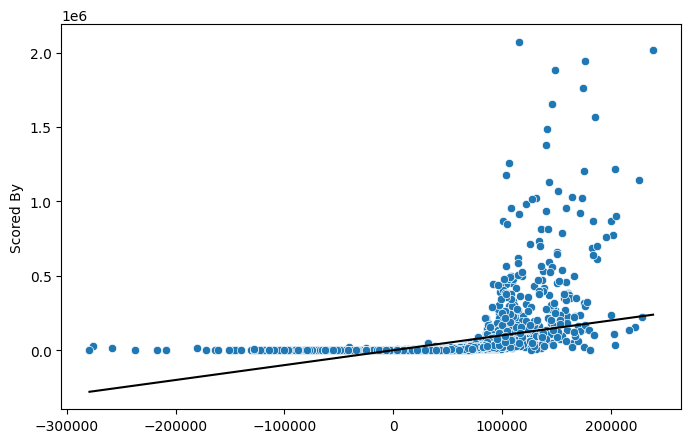

In [107]:
anime_scored_by = anime_full_dataset
y_test_source, prediction_source, model_source, X_train_source, X_test_source = run_prediction(anime_scored_by, 'Scored By')

### PART 4 - Error Analysis
---


#### On which items the model performs the worst? The best?

By the graph we can see that the model predicted the "Scored by" value much better when the value is lower, this is probably because there are more samples with those values and it's hard for the linear model to capture those non linear changes.
Let's demonstrate this by applying the pipline a few more times with different thresholds to the data.
We will point out that the range of Mean Absolute Perc Error we calculated is usually between 40 and 50.


#### 1000000 Threshold



### 🚀 **Running Predictions on Scored By Column** 🚀
---


r2 score: 0.232
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 36.782
Mean Absolute Error (Σ|y - pred|/n): 47,413
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 93,389
Max Error: 879,331


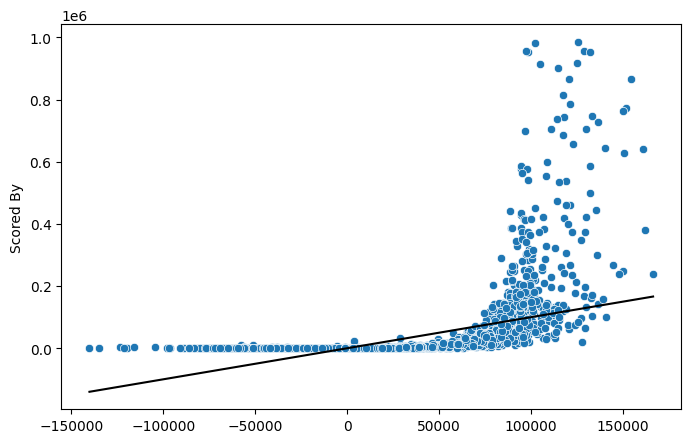


#### 500000 Threshold



### 🚀 **Running Predictions on Scored By Column** 🚀
---


r2 score: 0.306
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 28.229
Mean Absolute Error (Σ|y - pred|/n): 32,393
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 50,704
Max Error: 396,342


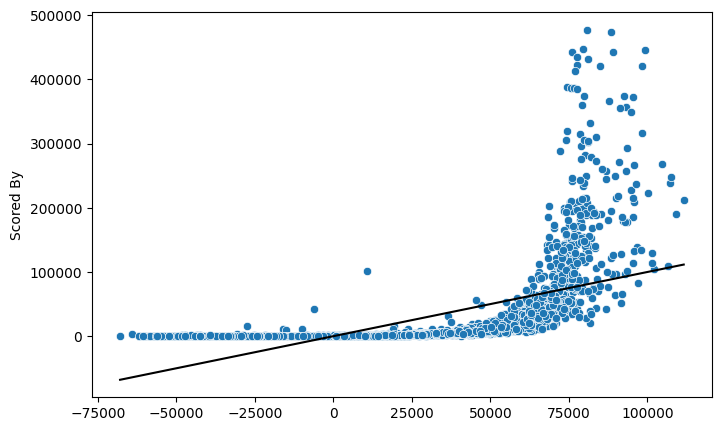


#### 100000 Threshold



### 🚀 **Running Predictions on Scored By Column** 🚀
---


r2 score: 0.444
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 12.354
Mean Absolute Error (Σ|y - pred|/n): 10,761
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 14,427
Max Error: 67,528


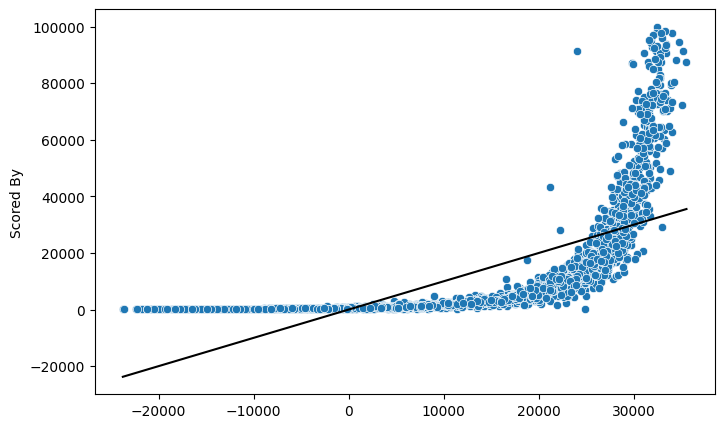


#### 50000 Threshold



### 🚀 **Running Predictions on Scored By Column** 🚀
---


r2 score: 0.530
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 6.961
Mean Absolute Error (Σ|y - pred|/n): 5,807
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 7,770
Max Error: 31,238


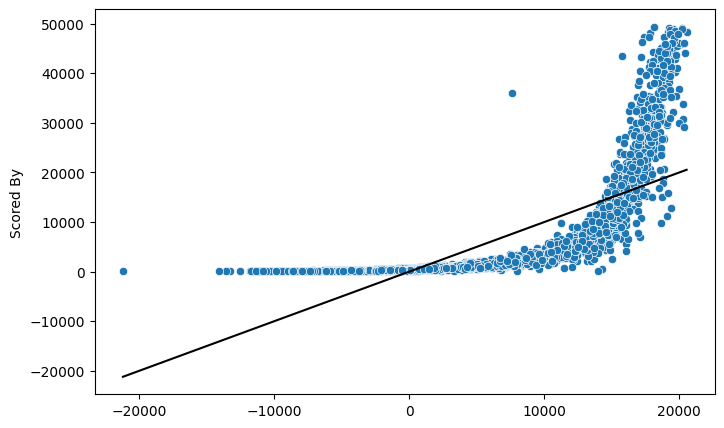

In [108]:
display(Markdown("""
#### 1000000 Threshold
"""))
_, _, _, _, _ = run_prediction(anime_scored_by[anime_scored_by['Scored By'] < 1000000], 'Scored By')
display(Markdown("""
#### 500000 Threshold
"""))
_, _, _, _, _ = run_prediction(anime_scored_by[anime_scored_by['Scored By'] < 500000], 'Scored By')
display(Markdown("""
#### 100000 Threshold
"""))
_, _, _, _, _ = run_prediction(anime_scored_by[anime_scored_by['Scored By'] < 100000], 'Scored By')
display(Markdown("""
#### 50000 Threshold
"""))
_, _, _, _, _ = run_prediction(anime_scored_by[anime_scored_by['Scored By'] < 50000], 'Scored By')

Let's summarize:
- For a threshold of 1000000 we get MAPE of: 39.709
- For a threshold of 500000 we get MAPE of: 28.481
- For a threshold of 100000 we get MAPE of: 10.677
- For a threshold of 50000 we get MAPE of: 7.058

We can see that as the range of the values gets smaller, so is the error.

Let's compare the "Scored By" metric with other metrics and see how they preformed


When we tested the numerical results, we saw overwhelming success, because the numerical values are all correlated positively or negatively with each other.
When a show is popular, is will be marked as favorite by more people (Favorites), it will have a higher rating (Score), it will be scored by more people because it will get more exposure (Scored by), and it will have higher rankings and be more popular (thus having lower values in Rank and Popularity columns).
To demonstrate it we will run the pipeline on two columns for example.


### 🚀 **Running Predictions on Score Column** 🚀
---


r2 score: 0.954
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.022
Mean Absolute Error (Σ|y - pred|/n): 0
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 0
Max Error: 3


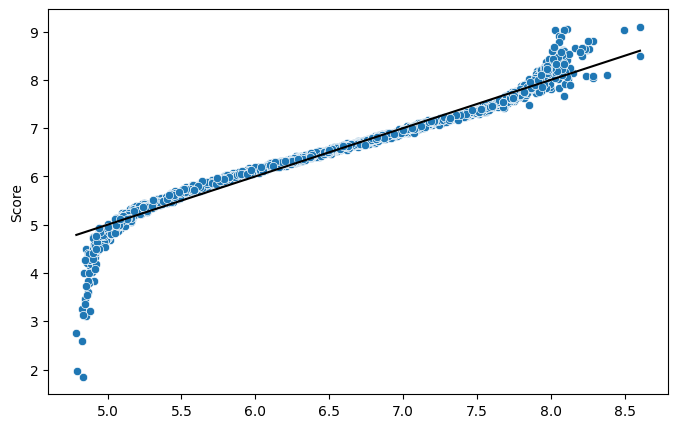


### 🚀 **Running Predictions on Rank Column** 🚀
---


r2 score: 0.956
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 1.802
Mean Absolute Error (Σ|y - pred|/n): 531
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 769
Max Error: 7,452


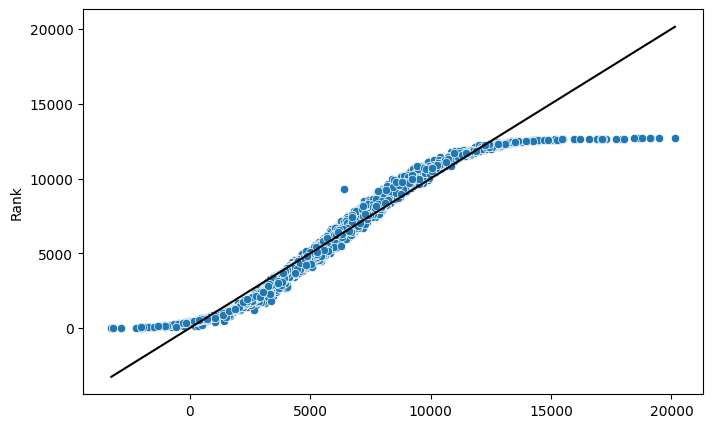

In [109]:
anime_score = anime_full_dataset
_, _, _, _, _ = run_prediction(anime_score, 'Score')
anime_rank = anime_full_dataset
_, _, _, _, _ = run_prediction(anime_rank, 'Rank')

In both cases the model has high success!
In both cases the r2 metric is around 95%, vero low MAPE and linear graphs are highly correlated to the data

Now lets see the scores of the categorical data:


### 🚀 **Running Predictions on Type Column** 🚀
---


Accuracy: 0.6045454545454545
 Precision: 0.6045454545454545
 Recall: 0.6045454545454545


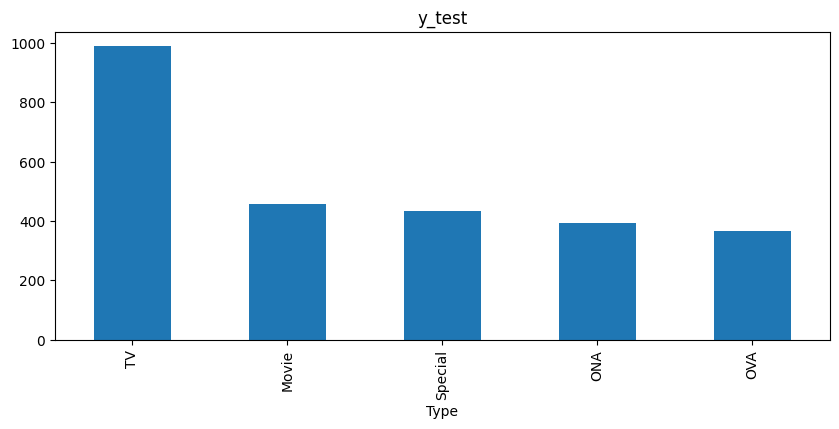

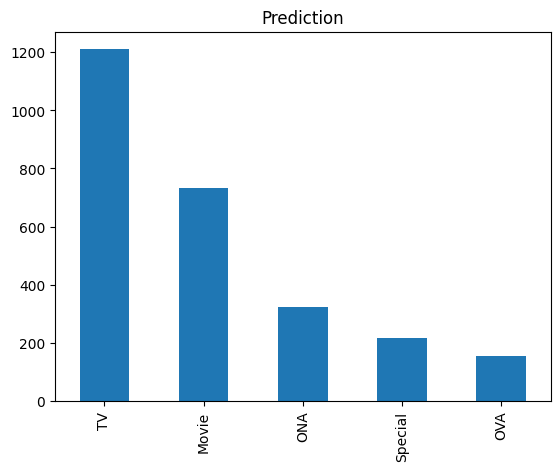


### 🚀 **Running Predictions on Rating Column** 🚀
---


Accuracy: 0.6083333333333333
 Precision: 0.6083333333333333
 Recall: 0.6083333333333333


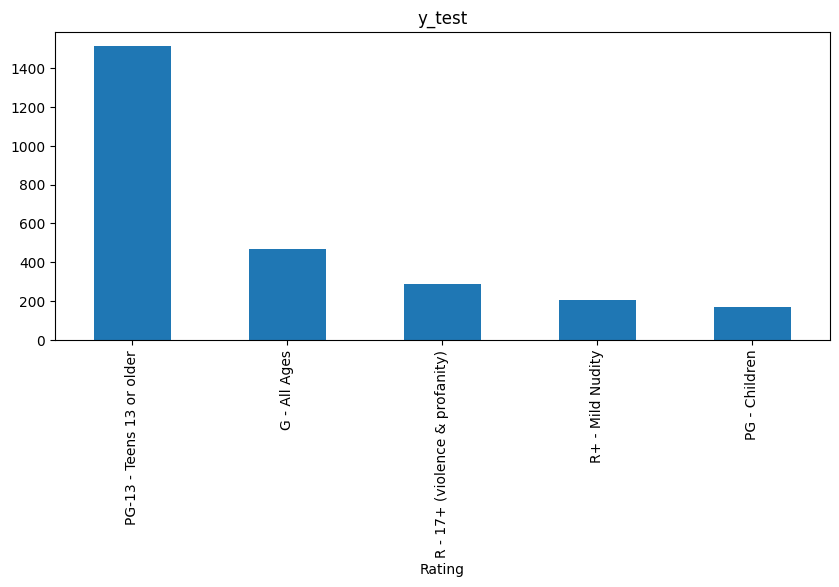

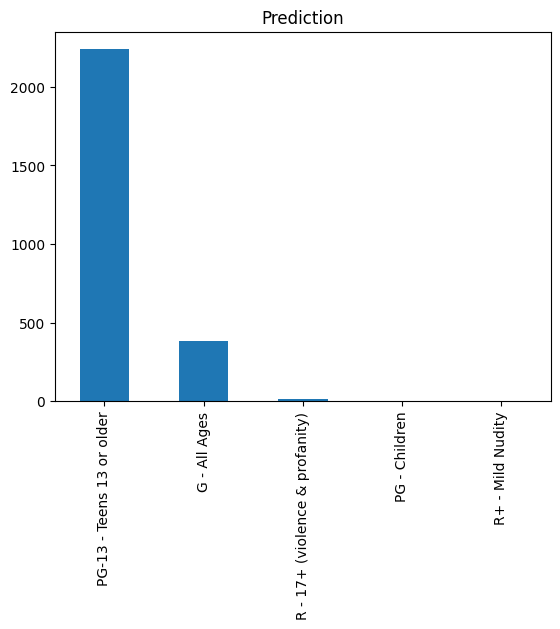

In [110]:
anime_type = anime_full_dataset
_, _, _, _, _ = run_prediction(anime_type, 'Type', categorical=True)
anime_rating = anime_full_dataset
_, _, _, _, _ = run_prediction(anime_rating, 'Rating', categorical=True)

So on both "Rating" and "Type" we have medium accuray of about 60%, this worse than the numerical evaluations we have.
We can explain this because the numerical values are all correlated positively or negatively with each other. When a show is popular, it will have a higher rating (Score), it will be scored by more people because it will get more exposure (Scored by), and it will have higher rankings and be more popular (thus having lower values in Rank and Popularity columns).

#### Are you able to find commonalities between the erroneous samples?

It is clear from the graphs above that the erroneous samples are those with extremly high Score By values, they are the samples that ruin our prediction.

['Novel' 'Original' 'Manga' 'Other' 'Game']
['Manga' 'Original' 'Novel']
Source
Manga       1105
Original     782
Novel        420
Game         187
Other        146
Name: count, dtype: int64


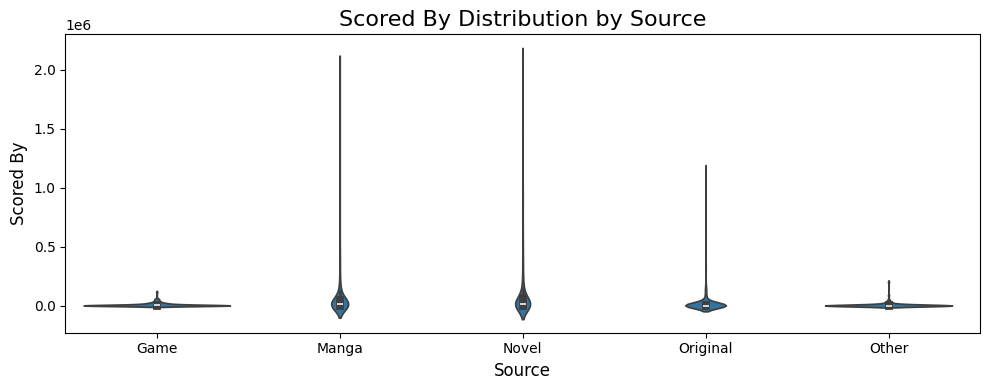

Source
Manga       35
Novel       15
Original     7
Name: count, dtype: int64


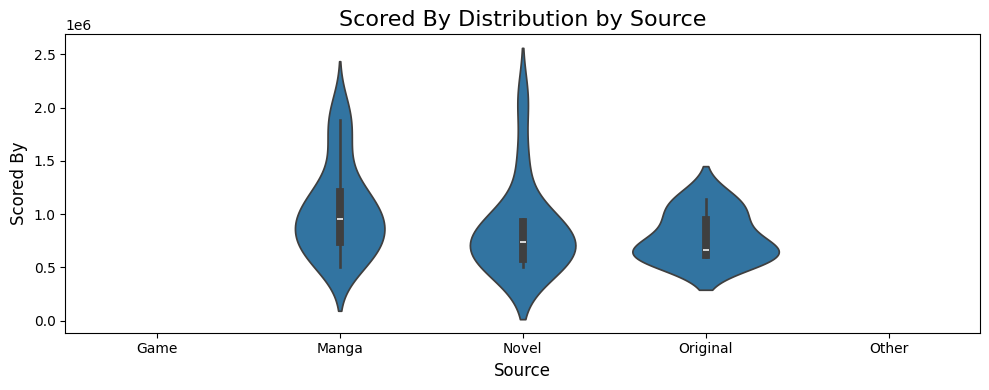

In [111]:
all_test_samples = X_test_source.copy()
all_test_samples["Scored By"] = y_test_source

all_test_samples['Source'] = [categories['Source'][idx] for idx in all_test_samples['Source']]

incorrect_samples = all_test_samples[all_test_samples['Scored By'] > 500000]


print(all_test_samples['Source'].unique())
print(incorrect_samples['Source'].unique())

def violin_scored_by_by_source(df):
  violin_column_by_source(df, "Scored By")

print(all_test_samples["Source"].value_counts())
violin_scored_by_by_source(all_test_samples)
print(incorrect_samples["Source"].value_counts())
violin_scored_by_by_source(incorrect_samples)

In the cell above we can see that the ratios between the sources aredifferent in the erroneous samples, and have a larger presence of manga and novel

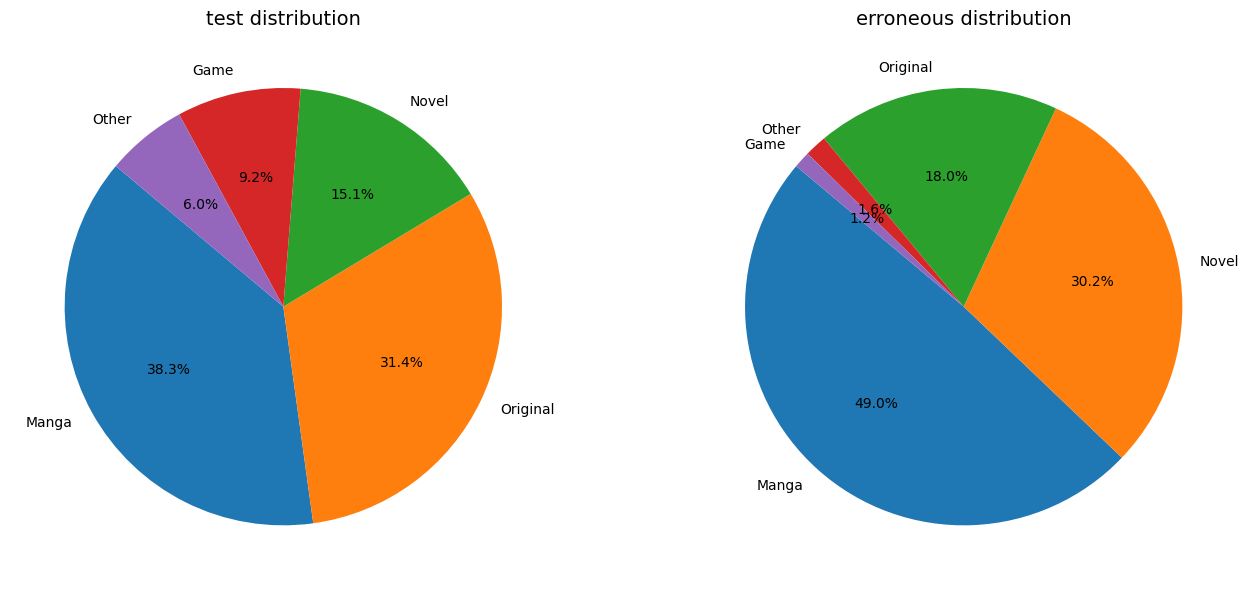

In [112]:
sizes1 = [1011, 830, 399, 242, 158]
sizes2 = [120, 74, 44, 4, 3]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(sizes1, labels=['Manga', 'Original', 'Novel', 'Game', 'Other'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
axes[0].set_title('test distribution', fontsize=14)
axes[1].pie(sizes2, labels=['Manga', 'Novel', 'Original', 'Other', 'Game'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
axes[1].set_title('erroneous distribution', fontsize=14)

plt.tight_layout()
plt.show()

Above we can see the exact distribution of sources (sorry for the different colors), so we can say that manga and novel animes are actually more likely to be bad samples.

#### Impact on the prediction

Let's try to use shap summary plots to view the columns that impact the prediction the most.

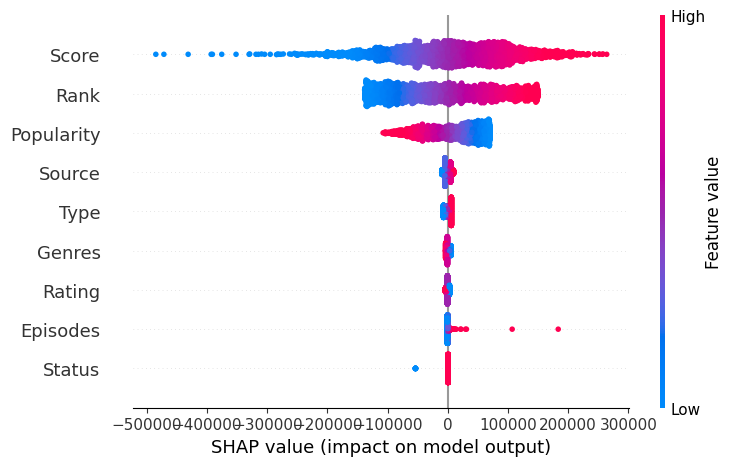

In [113]:
import shap

explainer = shap.Explainer(model_source, X_train_source)
shap_values = explainer(X_test_source)

shap.plots.beeswarm(shap_values)

We can see that the three features that were the most impactful are Scored, Ranked and popularity. Those three are metrics that indicate how popular the show is. It's suprising to us that Ranked and popularity actually have opposite impact on the predictions.

<Axes: >

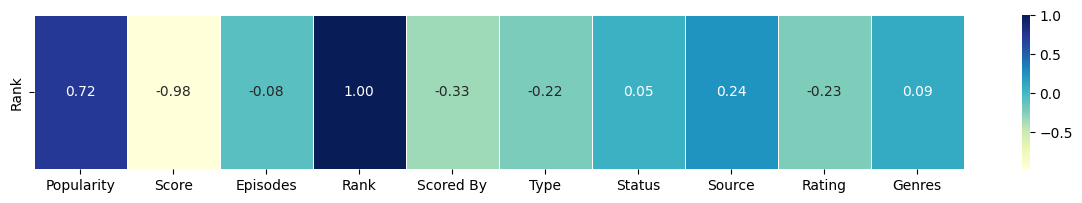

In [114]:
dtf_corr = anime_full_dataset.corr(method="pearson").loc[["Rank"]]
fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

#### Are some features sabotaging the model? How?

We couldn't find features that sabotage the model, but we assumed that the feature "anime_id" which has no real meaning besides giving a unique key value to a row will distrupt the prediction so we removed it beforehand.
Let's try adding it now and see the results on our target column, source


### 🚀 **Running Predictions on Scored By Column** 🚀
---


r2 score: 0.207
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 41.807
Mean Absolute Error (Σ|y - pred|/n): 59,458
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 126,733
Max Error: 1,936,775


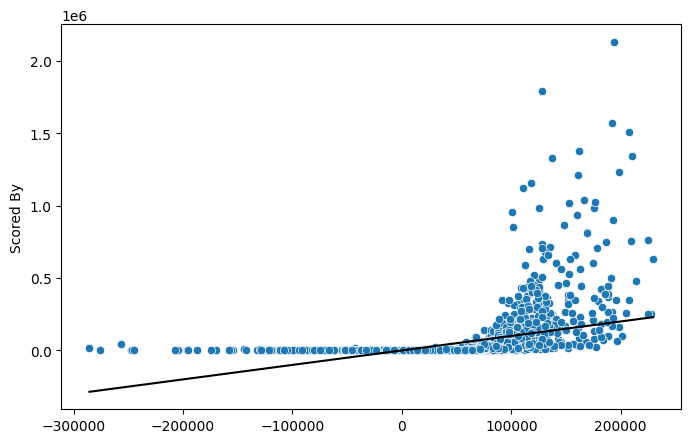

In [115]:
anime_dataset_with_id = anime_full_dataset
anime_dataset_with_id["anime_id"]  = anime_original_dataset["anime_id"]
_, _, _, _, _ = run_prediction(anime_dataset_with_id, 'Scored By')

We can see that the results are almost identical, even a little better, but it's probably coincidental, or results from overfitting to our data set. Clearly the anime_id that was given by the creator of the file by some order he chose doesn't really help the model infer how many people scored this anime.

### Sources
---

The example from class - https://github.com/amitsomech/TDS-COURSE/blob/master/1.%20Introduction/Typical%20Regression%20Pipeline.ipynb

cleaning the df using function from documentation -
https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.DataFrame.dropna.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

cool markdown and graphs help - chatgpt

more graphs help - https://python-graph-gallery.com/histogram/

help with categorical metric: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=Confusion%20matrixes%20can%20be%20created%20by%20predictions%20made%20from%20a%20logistic%20regression.&text=Next%20we%20will%20need%20to,%22%20and%20%22predicted%22%20values.&text=In%20order%20to%20create%20the,metrics%20from%20the%20sklearn%20module.


In [116]:
# test_df = anime_full_dataset
# # numbers_cols = ["anime_id", "Score", "Episodes", "Rank", "Popularity", "Favorites", "Scored By", "Members"]
# test_df = test_df.drop(columns=["Favorites", "Members"])


# test_df = test_df[test_df["Scored By"] < 50000]
# _, _, _, _, _ = run_prediction(test_df, 'Scored By')